In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

from scipy.fft import fft, fftshift
from IPython.display import Audio


# Definición de la señal

La frecuencia de muestreo de las señales de audio típicamente es de 44100 Hz (44.1 kHz).

Esto es porque típicamente, el oído humano distingue hasta 20 kHz.


En este caso, definimos $f_s$ y $t_s$.

Los valores de T y N (tiempo total y número de muestras se definen arbitrarimente). En este caso, escogimos 3 segundos. El número de muestras se calcula a partir del tiempo total y el período de muestreo.

In [3]:
Fs = 44100 
ts = 1/Fs

T = 3
N = int(T/ts)

t = np.linspace(0, T, N)
s = np.cos(2*np.pi*900*t) + np.cos(2*np.pi*10000*t)

Audio(s, rate=Fs)


# Cálculo del espectro

Para calcular el espectro, tomamos en consideración el mismo procedimiento del laboratorio anterior.


In [9]:
def plot_spectrum(s, Fs):
    S = fft(s) / len(s)
    S = fftshift(S)
    f = np.linspace(-Fs/2, Fs/2, len(S))

    S_mag = np.abs(S)
    S_mag_dB = 10 * np.log(S_mag)

    plt.figure()
    plt.plot(f, S_mag)
    plt.title("Espectro de la señal")

    
    plt.figure()
    plt.plot(f, S_mag_dB)
    plt.title("Espectro de la señal (dB)")


    plt.figure()
    plt.specgram(s, Fs=Fs)
    plt.title("Espectrograma de la señal")


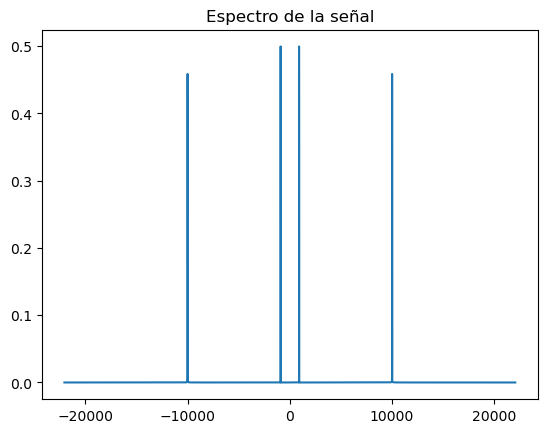

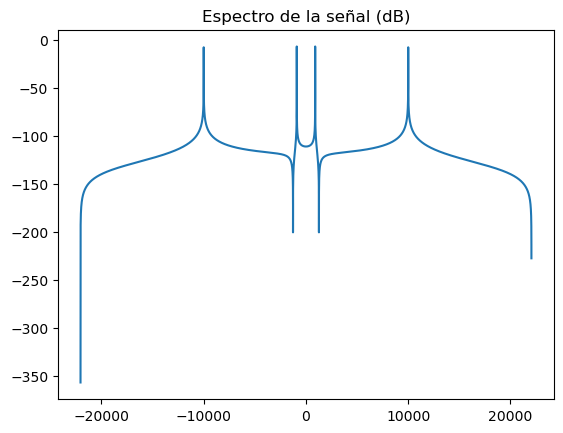

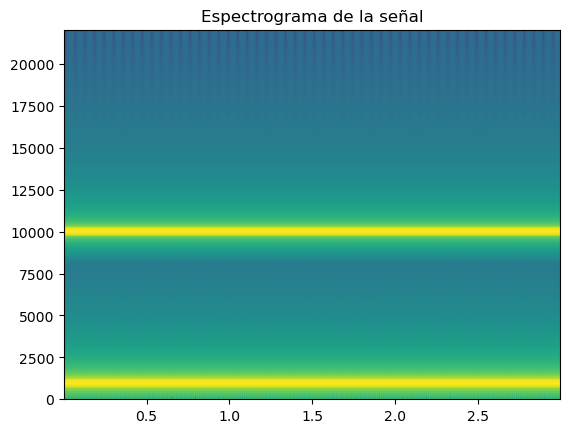

In [5]:
plot_spectrum(s, Fs)

# Cálculo de los coeficientes del filtro IIR

Para calcular los coeficientes del filtro, usaremos un filtro Butterworth, pasabajas, con frecuencia de corte de 6kHz.

El objetivo de usar el filtro pasabajas con esta frecuencia de corte, es eliminar la componente de 8kHz.


La función **freqz** permite obtener la respuesta en frecuencia del filtro (w, h) para graficar esta respuesta.



[ 5.04868656e-10  0.00000000e+00 -1.00973731e-08  0.00000000e+00
  9.59250446e-08  0.00000000e+00 -5.75550267e-07  0.00000000e+00
  2.44608864e-06  0.00000000e+00 -7.82748364e-06  0.00000000e+00
  1.95687091e-05  0.00000000e+00 -3.91374182e-05  0.00000000e+00
  6.35983045e-05  0.00000000e+00 -8.47977394e-05  0.00000000e+00
  9.32775133e-05  0.00000000e+00 -8.47977394e-05  0.00000000e+00
  6.35983045e-05  0.00000000e+00 -3.91374182e-05  0.00000000e+00
  1.95687091e-05  0.00000000e+00 -7.82748364e-06  0.00000000e+00
  2.44608864e-06  0.00000000e+00 -5.75550267e-07  0.00000000e+00
  9.59250446e-08  0.00000000e+00 -1.00973731e-08  0.00000000e+00
  5.04868656e-10] [ 1.00000000e+00 -9.10114717e+00  4.86180035e+01 -1.88570133e+02
  5.86433125e+02 -1.53493259e+03  3.48993131e+03 -7.03473543e+03
  1.27600787e+04 -2.10527911e+04  3.18595656e+04 -4.45055757e+04
  5.76825472e+04 -6.96408337e+04  7.85722047e+04 -8.30525856e+04
  8.24105369e+04 -7.68794365e+04  6.75021948e+04 -5.58238339e+04
  4.349

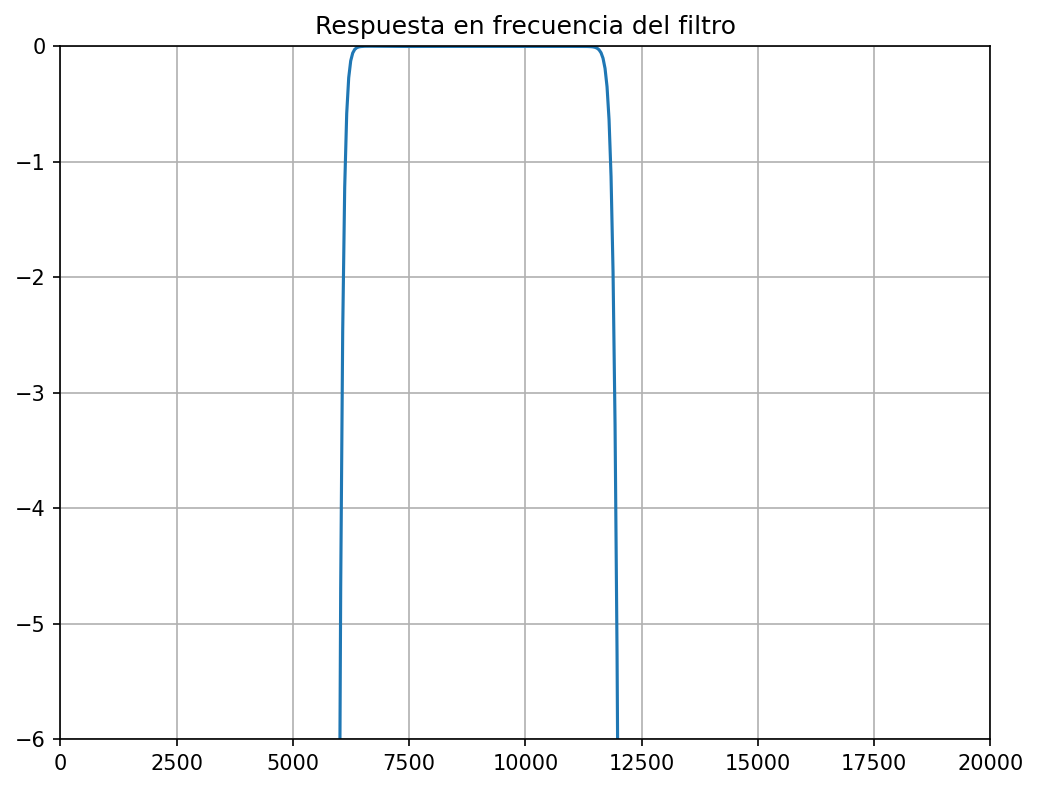

In [24]:
Wn = 6000 / (Fs/2)

b, a = signal.cheb(20, [6000, 12000], 'bandpass', fs=Fs)

print(b, a)
w, h = signal.freqz(b, a, fs=Fs)

plt.figure(figsize=(8, 6), dpi=150)
plt.axis([0, 20e3, -6, 0])

plt.grid()
plt.title('Respuesta en frecuencia del filtro')
plt.plot(w, 20*np.log(np.abs(h)))



# Señal filtrada

Para observar la señal filtrada, simplemente aplicamos la función lfilter, con la señal y los coeficientes calculados:

In [25]:
sf = signal.lfilter(b, a, s)

# Espectro de la señal filtrada

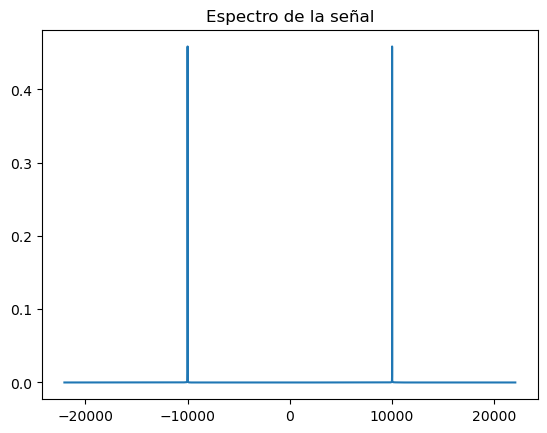

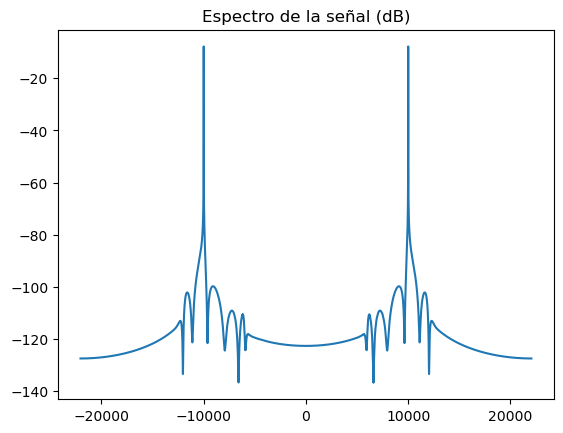

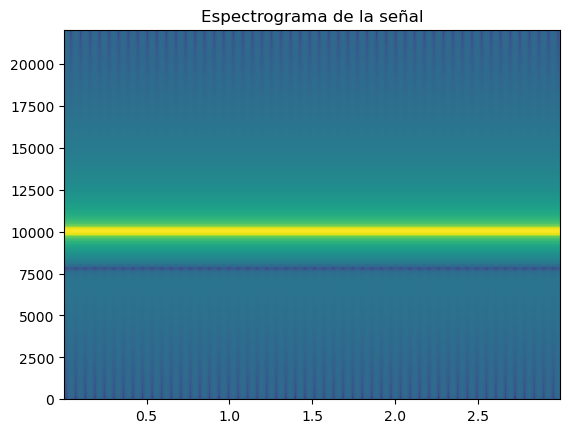

In [26]:
plot_spectrum(sf, Fs)

In [ ]:
Audio(sf, rate=Fs)

# Filtro FIR

In [33]:
# Parámetros generales
numtaps = 101  # Longitud del filtro

# Diseño de un filtro pasa-bajos

b = signal.firwin(numtaps, 6000, fs=Fs , window='hamming')
sf = signal.lfilter(b, 1, s)


In [34]:
Audio(sf, rate=Fs)

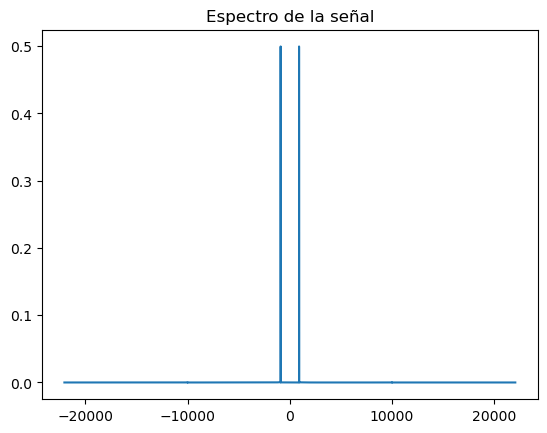

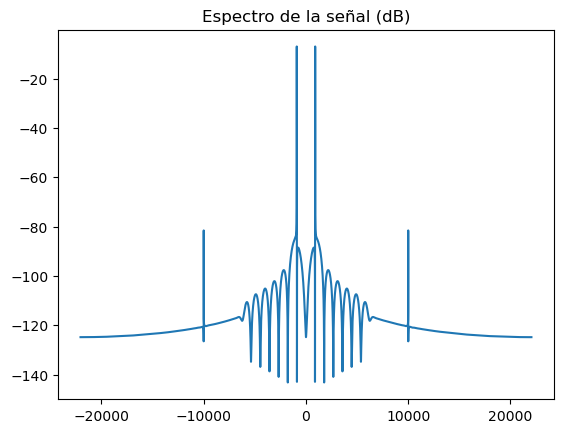

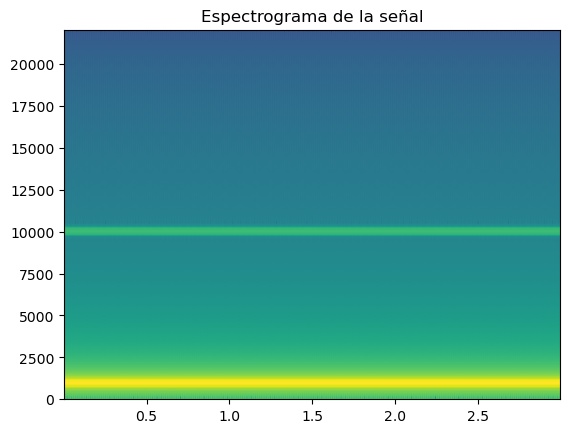

In [35]:
plot_spectrum(sf, Fs)